# Python Exam (Master, 2023): Least action principle

> + **Allocated time:** 1.5h
> + **Drop your final notebook** *renamed with your family name* at the end of the exam on this [page](https://cernbox.cern.ch/s/bI1GIkPeJqpBvQE)
> + **Allowed documents:** documentation of [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [scipy](https://docs.scipy.org/doc/scipy/reference/) as well as the documentation from the notebook interface using `Shift+tab` keyboard shortcut, `help(module)` or `help(function)`.
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about least action principle to answer the questions asked in this exam.*

## General informations

### A bit of context ...

Least action principle is a formalism which offers an alternative way to describe laws of mechanics, namely the fundamental principle of dynamics, as known as Newtow second's law. The basic idea is a classical system will evolve such that the trajectory $\vec{r}(t)$ minimizes a certain quantity, called *action*. In addition, the quantum mechanics can naturally be derived from the least action principle, assuming that *all trajectories are explored by the system*. If, after the exam, you want to read a bit more about this, you can read [the Feynman lectures on this topic](https://www.feynmanlectures.caltech.edu/II_19.html).


### Exam organisation

The first section of the exam is an introduction to the the notion of 'trajectory', which is the path followed by the system in space-time $(t, \vec{x})$. The second section proposes to develop a numerical method to compute integrals and quantify the precision of the numerical result. A third *bonus* section presents the computation the action for an actual physical problem.


### Import packages and plot cosmetics

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
import matplotlib as mpl
mpl.rcParams['legend.frameon']  = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize']  = 18
mpl.rcParams['axes.labelsize']  = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize']  = (5, 4)

## 1. [8 pts] Working with a trajectory

A trajectory is defined as being the evolution of variable describing a system (*e.g.* a spatial position) with time. We will consider a 1D system for this problem, having in mind a falling ball described by its height which varies with time $z(t)$. We will consider the following boundary conditions : the initial coordinate is $z_i=1$ at $t_i=0$ and the final one is $z_f=0$ at $t_f=1$.

**1.1 [1 pts]** Produce a graphic with these two points (no line in between).

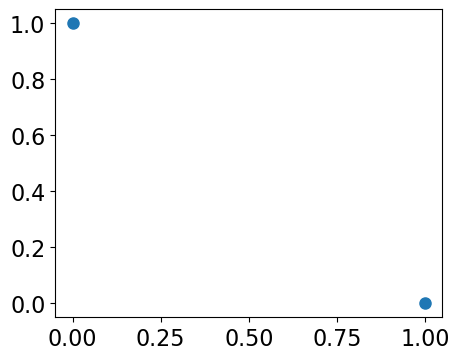

In [12]:
ts = np.array([0, 1])
zs = np.array([1, 0])
plt.plot(ts, zs, linewidth=0, markersize=8, marker='o');
#plt.plot(ts, zs, 'o')

**2. [2 pts]** We will now consider sets of functions that pass by these two points. We start with $f_p(t) = (1-t)^p$, where $p$ will later vary. Write a python function calculating to $f_p(t)$ for any $t$ and $p$ values. On the same figure, overlay curves corresponding to the points $(t, f_p(t))$ for 5 different $p$ values, from 0.1 to 10.

In [14]:
def traj(t, p=1):
    return (1-t)**p

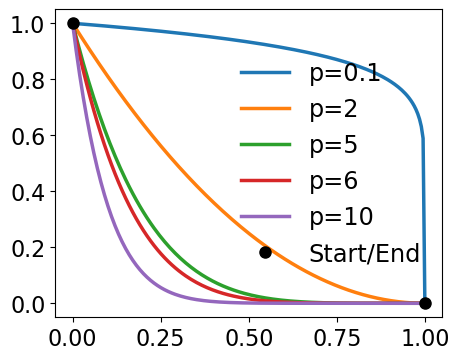

In [15]:
Ts = np.linspace(0, 1, 200)
for p in [0.1, 2, 5, 6, 10]:
    Ys = traj(Ts, p)
    plt.plot(Ts, Ys, label=f'p={p}')
plt.plot(ts, zs, linewidth=0, markersize=8, marker='o', color='black', label='Start/End')
plt.legend();

**3. [2 pts]** Create a discrete path, *i.e.* a set of $N$ points $(x_i, t_i)$ satisfying $x_i = f(t_i)$, with $N=1000$ and $p=5$. Compute numerically the derivative of this trajectory $\frac{\Delta x}{\Delta t}$, defined as below. Note that in this definition, the obtained derivative is actually the one evaluated on $\frac{t_{i+1}+t_{i}}{2}$. 
$$
\frac{\Delta x}{\Delta t} \equiv \frac{x_{i+1} - x_{i}}{t_{i+1} - t_{i}}
$$

In [16]:
Ts = np.linspace(0, 1, 1000)
Xs = traj(Ts, p=5)

dXs = Xs[1:] - Xs[:-1]
dTs = Ts[1:] - Ts[:-1]
dXdT = dXs / dTs

**4. [3 pts]** Now, we want to plot the discrete derivative and path as function of time, on the same plot :

 - **a** this is not possible with the previously obtained array of the derivative, why ?
 - **b** fix it by redefining $x_i$ and $t_i$ values. Produce the plot.

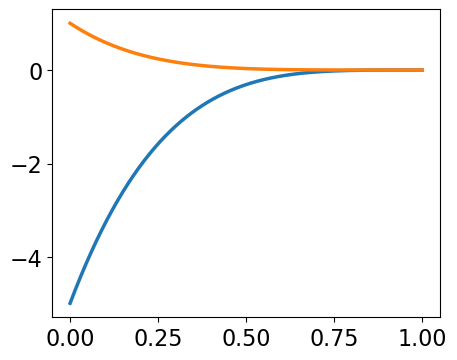

In [21]:
plt.plot(Ts[:-1], dXdT)
plt.plot(Ts, Xs);

## 2. [12 pts] Numerical integral

The goal of this section is to write a python function that compute the discrete integral of a mathematical function $L(t)$ on $[0, 1]$, defined as:
$$
\int^1_0 L(t)\, dt \; \approx \; \sum^{N-2}_{i=0} \: L(t_i) \, \Delta t_i
$$
where $N$ is the number of points used for the discretisation ($t_0=0$, $t_{N-1}=1$) and $\Delta t_i \equiv t_{i+1} - t_{i}$. This method is also known as the rectangle method. Pay attention that the last point is left out from the sum : $i$ stops at $N-2$.

**2.1 [3 pts]** Write a function taking in argument a mathematical function $L$ and $N$, which:
   1. creates a discrete set of $N$ points $(x_i, t_i)$ from a mathematical equation $L$ (we'll take $N=1000$ by default)
   2. compute the array of $\Delta t_i$
   3. compute and return the discrete integral

In [27]:
def integral(L, N=1000):

    # Step 1
    ts = np.linspace(0, 1, N)
    Ls = L(ts)[:-1]
    
    # Step 2
    dts = ts[1:]-ts[:-1]

    # Step 3
    return np.sum(Ls*dts)

**2.2 [1 pts]** Show that the result of the obtained function applied on $L(t)=(1-t)^3$ is $0.2505$

In [28]:
f = lambda t: (1-t)**3
integral(f)

0.25050075100125146

**2.3 [8 pts] Convergence test using existing data.** For $L(t) = (1-t)^p$, the exact integral can be easily computed and is:
$$
I_{exact} \; \equiv \; \int^1_0 L(t) \, dt \;=\; \frac{1}{p+1}
$$

The goal of this question is to find what is the minium number of discrete points to obtain a precision better than 0.01% on the integral. For this, a dataset `integral_data.csv` is provided and contains the value of the numerical integral for different $N$ values, and this for 7 different values of $p$: `[3, 5, 10, 15, 20, 25, 30]`.


**2.3.1 [1 pts]** Load the `csv` as a dataframe. How many N values are included in the dataset ?

In [29]:
df = pd.read_csv('integral_data.csv')
df

,N,p_3,p_5,p_10,p_15,p_20,p_25,p_30
0,1000,0.250501,0.167168,0.091410,0.063002,0.048121,0.038964,0.032761
1,1010,0.250496,0.167163,0.091405,0.062997,0.048116,0.038959,0.032756
2,1020,0.250491,0.167158,0.091401,0.062992,0.048111,0.038954,0.032751
3,1030,0.250486,0.167153,0.091396,0.062987,0.048107,0.038949,0.032746
4,1040,0.250481,0.167148,0.091391,0.062982,0.048102,0.038945,0.032742
...,...,...,...,...,...,...,...,...
14895,149950,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261
14896,149960,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261
14897,149970,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261
14898,149980,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261


**2.3.2 [2 pts]** For each p value, add a new column corresponding to the relative error of the computed integral:
$$
\sigma = \frac{I - I_{exact}}{I_{exact}}
$$

In [31]:
ps = [3, 5, 10, 15, 20, 25, 30]
for p in ps:
    I = 1./(1+p)
    df[f'relerr_p{p}'] = (df[f'p_{p}'] - I) / I

df

,N,p_3,p_5,p_10,p_15,p_20,p_25,p_30,relerr_p3,relerr_p5,relerr_p10,relerr_p15,relerr_p20,relerr_p25,relerr_p30
0,1000,0.250501,0.167168,0.091410,0.063002,0.048121,0.038964,0.032761,0.002003,0.003006,0.005515,0.008028,0.010546,0.013067,0.015593
1,1010,0.250496,0.167163,0.091405,0.062997,0.048116,0.038959,0.032756,0.001983,0.002976,0.005460,0.007948,0.010441,0.012937,0.015438
2,1020,0.250491,0.167158,0.091401,0.062992,0.048111,0.038954,0.032751,0.001964,0.002946,0.005406,0.007870,0.010338,0.012810,0.015286
3,1030,0.250486,0.167153,0.091396,0.062987,0.048107,0.038949,0.032746,0.001945,0.002918,0.005354,0.007793,0.010237,0.012685,0.015136
4,1040,0.250481,0.167148,0.091391,0.062982,0.048102,0.038945,0.032742,0.001926,0.002890,0.005302,0.007718,0.010138,0.012562,0.014990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,149950,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261,0.000013,0.000020,0.000037,0.000053,0.000070,0.000087,0.000103
14896,149960,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261,0.000013,0.000020,0.000037,0.000053,0.000070,0.000087,0.000103
14897,149970,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261,0.000013,0.000020,0.000037,0.000053,0.000070,0.000087,0.000103
14898,149980,0.250003,0.166670,0.090912,0.062503,0.047622,0.038465,0.032261,0.000013,0.000020,0.000037,0.000053,0.000070,0.000087,0.000103


**2.3.3 [2 pts]** Plot the logarithm of the relative error versus N, for all p values on the same figure.

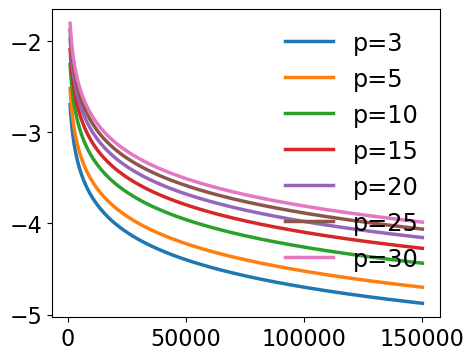

In [35]:
for p in ps:
    plt.plot(df['N'], np.log10(df[f'relerr_p{p}']), label=f'p={p}')
plt.legend();

**2.3.4 [3 pts]** For each value of $p$, find the first value of N for which $\sigma<10^{-4}$. Which reason could explain the trend with p ?

3 20010
5 30010
10 55010
15 80010
20 105010
25 130010
30 -1


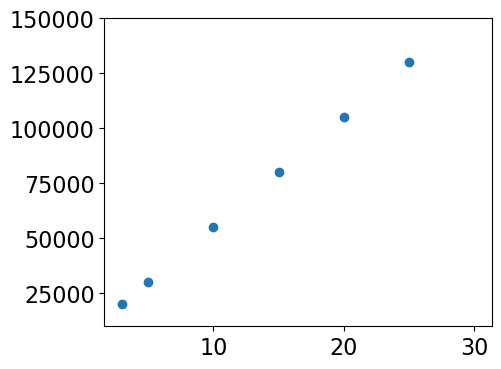

In [47]:
res = []
for p in ps:
    re = df[f'relerr_p{p}'].values
    ns = df['N'].values
    nsOK = ns[re<1e-4]
    if nsOK.size>0:
        res.append(nsOK.min())
    else:
        res.append(-1)

# Print
for p, n in zip(ps, res):
    print(p, n)

# Plot
plt.plot(ps, res, linewidth=0, marker='o')
plt.ylim(10e3, 150e3);

**2.4 [Bonus 2 pts] Convergence test computing data.** Considering p values of `[3, 5, 10, 20]`, compute the value of $N$ for which the numerical integral is accurate at $0.01\%$, by performing yourself all integral computations. One can scan N values from 1000 to 15000 using a step of 500.

## 3. [Bonus 6 pts] Computing the action of a system

We now have everything in hand to compute a path integral. For this, we define the *lagrangien* of the system as being $\mathcal{L} = K - V$, where $K$ is the kinetic energy $K=\frac{1}{2} m \left(\frac{\Delta x}{\Delta t}\right)^2$ and $U$ is the potential energy (*e.g.* for a free falling problem, $V(x) = -mgx$). The lagrangien is a function of time, through the trajectory $x(t)$ and an integral over time can be performed : it defines the *action* $\mathcal{S} = \int \mathcal{L}(t) dt$. Note that the lagrangian can be seen as a 'function of function', since it depends on $t$ only *via* a function $x(t)$.

**3.1 [1 pts]** Define a python function `lagrangian_terms(f, N)` which takes in argument a function `f(x)` and $N$, being the number of discret points, and returns four arrays:
 + `T`: $(t_i+t_{i+1})/2$ values, 
 + `dT`: $(t_i-t_{i+1})$ values, 
 + `K` and `V` such as $\mathcal{L} = K-V$.
 
We consider the case of a free falling system with $m=1$kg and $g=1$m.s$^{-2}$ : 

$$
K=\frac{1}{2} m \left(\frac{\Delta x}{\Delta t}\right)^2
$$

$$
V = -x(t)
$$


**3.2 [1 pts]** Overlay on the same figure the kinetic energy, the potential energy and the lagrangien as function of time for $x(t) = (1-t)^3$. If you want (not mandatory), you can encapsulate this into a function `plot_lagrangian(traj, N)` which takes in argument a mathematical function `traj`, the number of discrete points `N`, and and does all the steps up to the plotting.

**3.3 [2 pts]** The goal of this function is to write and test a function that computes the action for a given mathematical function $x(t)$. The arguments would be the lagrangien function `lag` (as defined in question 3.1 for the free falling problem), the trajectory function describing $x(t)$ `traj` and the number of discrete points $N$.

 a. Write the function.

 b. Show that the action for the free falling problem with a trajectory $x(t)=(1-t)^3$, discretized with $N=1000$ points, is $\mathcal{S}=1.15$ J.s

**3.4 [1 pts]** For which value $p_{min}$, the action is minimal assuming a trajectory $x(t)=(1-t)^p$ ? We would consider to scan the value of $p$ from 0.5 to 4, with $200$ values. What is the value of the minimized action ?

**3.5 [1 pts]** Plot each term of the lagrangian and the lagrangian for $p=1$, $p=p_{min}$ and $p=3$. On a third plot, overlay the three trajectories $x(t)=(1-t)$, $x(t)=(1-t)^{p_{min}}$ and $x(t)=(1-t)^3$.